<center><h1>Homework 5</h1></center>
<center>邵彦骏 19307110036</center>

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.rcParams['font.family']='SimHei'
plt.rcParams['font.size']=20
plt.rcParams['figure.figsize']=(15,8)

#### 1. 统计训练集中各个政府单位接到的市民投诉量

In [2]:
train = pd.read_csv('data/train_set.csv')
test = pd.read_csv('data/test_set.csv')

In [3]:
train.head()

,单位名称,换车,商户,吉林大路,还在,给出,安全标准,地,是因为,东北师范大学,...,绿园,门将,研究所,世纪家园,水务,提醒,照,煦,煤,后门
0,市供热公司,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,市燃气集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,市公交集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,单位名称,换车,商户,吉林大路,还在,给出,安全标准,地,是因为,东北师范大学,...,绿园,门将,研究所,世纪家园,水务,提醒,照,煦,煤,后门
0,市公交集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,市供热公司,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,市运输管理局,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,市运输管理局,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


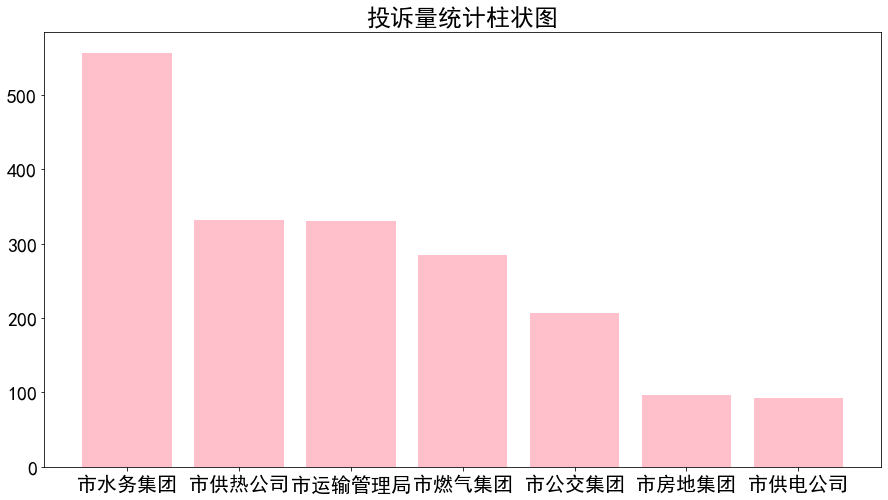

In [5]:
df = train.单位名称.value_counts()
plt.bar(x=df.index, height=df.array, color='pink')
plt.title('投诉量统计柱状图')
plt.show()

训练集中，市水务集团收到投诉信最多，可以看出它们存在较大的问题，而市房地集团和市供电公司收到的投诉不多，它们可能不需要处理太多内容。

#### 2. 统计每条投诉用词数

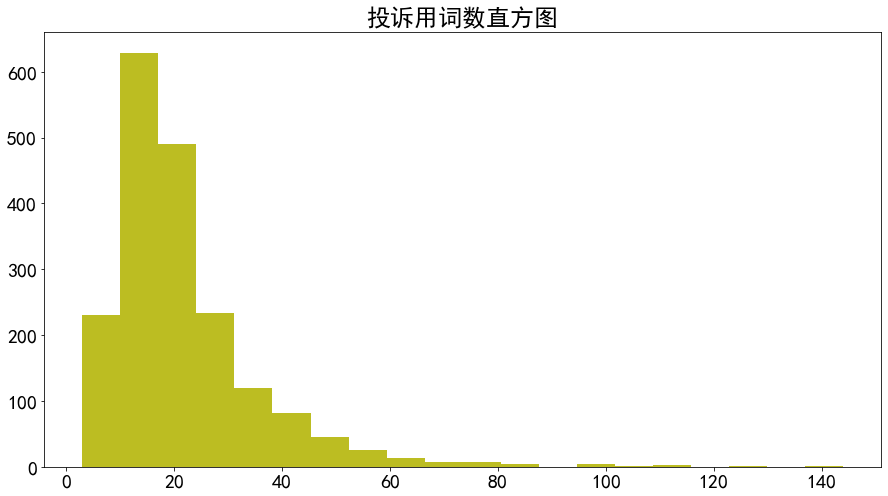

In [6]:
df=train.sum(axis=1)
df.index=train.单位名称

plt.hist(df, histtype='stepfilled',color='C8',bins=20)
plt.title('投诉用词数直方图')
plt.show()

大多数投诉信都用了不到20词，说明投诉信本身并不需要表达太多内容，百姓一般只需要用较少的词汇将问题表达清楚即可。整个分布呈正偏态，可以看出只有极少人愿意写长文来控诉政府。

#### 3. 各单位收集到投诉信息分词后总词数的差异

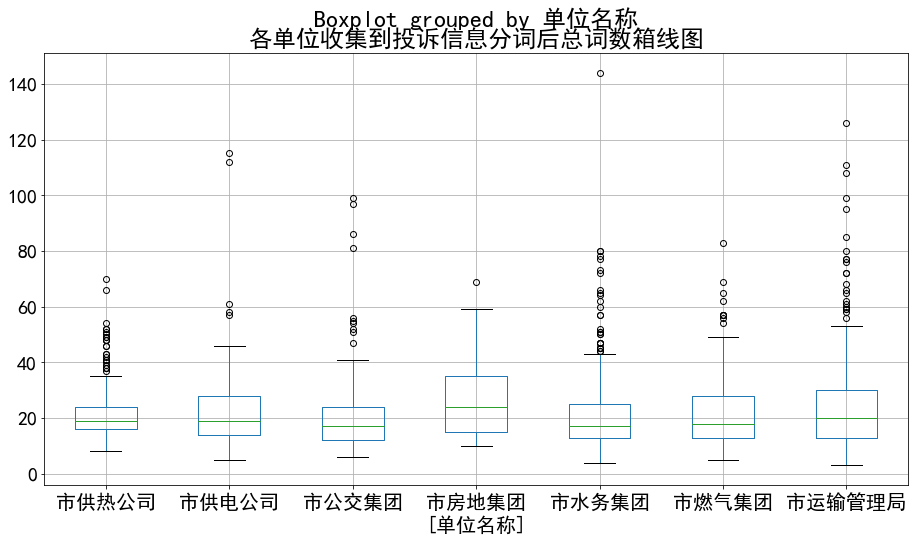

In [28]:
df = pd.DataFrame(df)
df.boxplot(by='单位名称')
plt.title('各单位收集到投诉信息分词后总词数箱线图')
plt.show()

总体来看，市房地集团收到的投诉信普遍比较长，有可能是因为这些投诉信反映了很多重要的问题，而百姓怨言更多。市公交集团收到的投诉信普遍很短，或许市民没有很多内容想要反馈。

#### 4. 朴素贝叶斯方法对市政电话文本进行分类

In [138]:
nb = MultinomialNB(alpha=1)
le = preprocessing.LabelEncoder()
train_y = le.fit_transform(train.单位名称)
nb.fit(X=train.iloc[:,1:], y=train_y)
pred_y = nb.predict(X=test.iloc[:,1:])
test_y = le.transform(test.单位名称)
cm = confusion_matrix(pred_y, test_y)
print(f'分类正确率{sum(pred_y==test_y)/len(test_y)*100}%')

分类正确率97.0%


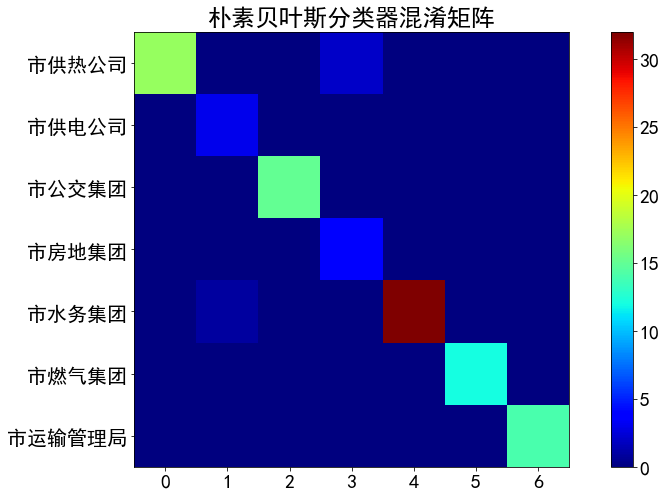

In [139]:
fig, ax = plt.subplots(1,1)
img = ax.imshow(cm, cmap='jet')
plt.colorbar(img)
plt.title('朴素贝叶斯分类器混淆矩阵')
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels(le.classes_)
plt.show()

分类正确率97%，显示出朴素贝叶斯分类模型非常有效果。值得警惕的是，测试集中市房地集团本来就不多（6个），但是有2条投诉信被分类到市供热公司去了，这会给本身业务繁忙的市供热公司带来麻烦，而误分类率也变得非常高。